# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [14]:
def f(x):
    f = x**2*numpy.sin(x)
    return f;

Ensure your function works with numpy arrays:

In [15]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [41]:
def g(x):
    g = 2*x*numpy.sin(x) + (2 - (x**2))*(numpy.cos(x)) - 2
    return g;
    

Check your solution with the same numpy array:

In [120]:
assert g(0) == 0.

In [121]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [122]:
def integrate_analytic(xmin, xmax):
    i = 2*xmax*numpy.sin(xmax) + (2 - (xmax**2))*(numpy.cos(xmax)) - (2*xmin*numpy.sin(xmin) + (2 - (xmin**2))*(numpy.cos(xmin)))
    return i;

Check your analytic function:

In [124]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [135]:
def integrate_numeric(xmin, xmax, N):
    
    
    dx = ((xmax - xmin))/N
    h = f(xmin) + f(xmax)
    k = 0
    for i in range (0, N ):
        k = k + 4*f(xmin+i*dx + dx/2)
    for i in range (1, N):
        k = k + 2*f(xmin + i*dx)
    m = (h + k)*dx/6
    return m;

Make sure you have implemented Simpson's rule correctly:

In [136]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [137]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Simpsons Rule')

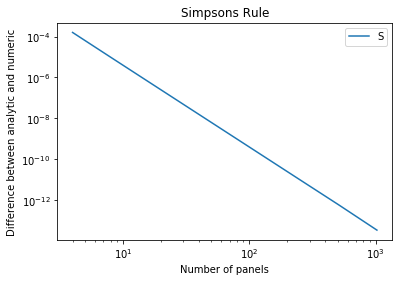

In [142]:
x0, x1 = 0, 2
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
result_analytic = integrate_analytic(x0, x1)

list1 = []
for i in (panel_counts):
    d = (result_analytic - integrate_numeric(x0, x1, i))/ result_analytic
    list1.append(d)
plt.loglog (panel_counts, list1)
plt.xlabel("Number of panels")
plt.ylabel("Difference between analytic and numeric")
plt.legend("S")
plt.title("Simpsons Rule")


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increassing the number of panels used increases the accuracy and reduces the error of estimate as the error follows a number of panels to the power of minus 4 rate. This becomes a straight line when the y-axis is logarithmic. However, if there are too many panels, the error becomes inconsistent and the accuracy falls. The limit when using python is about 10 to the power of 5 when using a small integral range to the decimal rounding errors (about 5 d.p) that python has.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The trapezium rule has an error following the pattern N to the power of minus 2. So, at first, as more panels are used there will be a higher accuracy, although not as accurate as simpson's rule. Once again, for the same reason, after a certain point the accuracy decreases due to the python rounding errors and thus at about N = 10^6 it would start being less accurate.The rounding erros stem from when n becomes too large h will become very, very small.